#Support Vector Machine

##นำเข้าข้อมูล

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import pandas as pd
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [4]:
train

,text,sentiment,clean_text,clean2_text,clean3_text,clean4_text,wordseged_text,wordseged_space_text
0,ประสิทเจียวก็คนดี,1,ประสิทเจียวก็คนดี,ประสิทเจียวก็คนดี,ประสิทเจียวก็คนดี,ประสิทเจียวก็คนดี,"['ประ', 'สิ', 'ท', 'เจียว', 'ก็', 'คนดี']",ประ สิ ท เจียว ก็ คนดี
1,สุดยอดคุณรังสิมันโลมพูดได้ถูกใจมากค่ะ,2,สุดยอดคุณรังสิมันโลมพูดได้ถูกใจมากค่ะ,สุดยอดคุณรังสิมันโลมพูดได้ถูกใจมากค่ะ,สุดยอดคุณรังสิมันโลมพูดได้ถูกใจมากค่ะ,สุดยอดคุณรังสิมันโลมพูดได้ถูกใจมากค่ะ,"['สุดยอด', 'คุณ', 'รังสิ', 'มัน', 'โลม', 'พูด'...",สุดยอด คุณ รังสิ มัน โลม พูด ได้ ถูกใจ มาก ค่ะ
2,อ้าววันนี้เอาแฝดคนละฝามาเจอกันวิเคราะห์การเมือ...,1,อ้าววันนี้เอาแฝดคนละฝามาเจอกันวิเคราะห์การเมือ...,อ้าววันนี้เอาแฝดคนละฝามาเจอกันวิเคราะห์การเมือ...,อ้าววันนี้เอาแฝดคนละฝามาเจอกันวิเคราะห์การเมือ...,อ้าววันนี้เอาแฝดคนละฝามาเจอกันวิเคราะห์การเมือ...,"['อ้าว', 'วันนี้', 'เอา', 'แฝด', 'คนละ', 'ฝา',...",อ้าว วันนี้ เอา แฝด คนละ ฝา มา เจอกัน วิเคราะห...
3,ขอบคุณสุภาพบุรุษที่ชื่อพิธาที่ยังห่วงใยประชาชน...,2,ขอบคุณสุภาพบุรุษที่ชื่อพิธาที่ยังห่วงใยประชาชน...,ขอบคุณสุภาพบุรุษที่ชื่อพิธาที่ยังห่วงใยประชาชน...,ขอบคุณสุภาพบุรุษที่ชื่อพิธาที่ยังห่วงใยประชาชน...,ขอบคุณสุภาพบุรุษที่ชื่อพิธาที่ยังห่วงใยประชาชน...,"['ขอบคุณ', 'สุภาพบุรุษ', 'ที่', 'ชื่อ', 'พิธา'...",ขอบคุณ สุภาพบุรุษ ที่ ชื่อ พิธา ที่ ยัง ห่วงใย...
4,นับวันยิ่งแย่ลงๆทุกทีเดียวอีกหน่อยจะเป็นเหมือน...,0,นับวันยิ่งแย่ลงๆทุกทีเดียวอีกหน่อยจะเป็นเหมือน...,นับวันยิ่งแย่ลงๆทุกทีเดียวอีกหน่อยจะเป็นเหมือน...,นับวันยิ่งแย่ลงๆทุกทีเดียวอีกหน่อยจะเป็นเหมือน...,นับวันยิ่งแย่ลงๆทุกทีเดียวอีกหน่อยจะเป็นเหมือน...,"['นับวัน', 'ยิ่ง', 'แย่', 'ลง', 'ๆ', 'ทุก', 'ท...",นับวัน ยิ่ง แย่ ลง ๆ ทุก ทีเดียว อีกหน่อย จะ เ...
...,...,...,...,...,...,...,...,...
31267,คุณคือคนดีของสังคมยัวมีโอกาสสู้ต่อไปคะ,2,คุณคือคนดีของสังคมยัวมีโอกาสสู้ต่อไปคะ,คุณคือคนดีของสังคมยัวมีโอกาสสู้ต่อไปคะ,คุณคือคนดีของสังคมยัวมีโอกาสสู้ต่อไปคะ,คุณคือคนดีของสังคมยัวมีโอกาสสู้ต่อไปคะ,"['คุณ', 'คือ', 'คนดี', 'ของ', 'สังคม', 'ยัว', ...",คุณ คือ คนดี ของ สังคม ยัว มีโอกาส สู้ ต่อไป คะ
31268,555สุดยอดเลย,2,555สุดยอดเลย,555สุดยอดเลย,555สุดยอดเลย,555สุดยอดเลย,"['555', 'สุดยอด', 'เลย']",555 สุดยอด เลย
31269,บุกแม้งกระทืบแม้งพวกที่ทำให้ประเทศไทยแย่ประชาช...,0,บุกแม้งกระทืบแม้งพวกที่ทำให้ประเทศไทยแย่ประชาช...,บุกแม้งกระทืบแม้งพวกที่ทำให้ประเทศไทยแย่ประชาช...,บุกแม้งกระทืบแม้งพวกที่ทำให้ประเทศไทยแย่ประชาช...,บุกแม้งกระทืบแม้งพวกที่ทำให้ประเทศไทยแย่ประชาช...,"['บุก', 'แม้', 'งก', 'ระ', 'ทืบ', 'แม้', 'ง', ...",บุก แม้ งก ระ ทืบ แม้ ง พวก ที่ ทำให้ ประเทศ ไ...
31270,สุดยอดครับ,2,สุดยอดครับ,สุดยอดครับ,สุดยอดครับ,สุดยอดครับ,"['สุดยอด', 'ครับ']",สุดยอด ครับ


In [5]:
test

,text,sentiment,clean_text,clean2_text,clean3_text,clean4_text,wordseged_text,wordseged_space_text
0,สมัยหน้าพรรคคุณมีเก้าอี้เพิ่มแน่นอนครับ,1,สมัยหน้าพรรคคุณมีเก้าอี้เพิ่มแน่นอนครับ,สมัยหน้าพรรคคุณมีเก้าอี้เพิ่มแน่นอนครับ,สมัยหน้าพรรคคุณมีเก้าอี้เพิ่มแน่นอนครับ,สมัยหน้าพรรคคุณมีเก้าอี้เพิ่มแน่นอนครับ,"['สมัย', 'หน้า', 'พรรค', 'คุณ', 'มี', 'เก้าอี้...",สมัย หน้า พรรค คุณ มี เก้าอี้ เพิ่ม แน่นอน ครับ
1,สมแล้วค่ะที่ชื่อพรรคเป็นธรรม,2,สมแล้วค่ะที่ชื่อพรรคเป็นธรรม,สมแล้วค่ะที่ชื่อพรรคเป็นธรรม,สมแล้วค่ะที่ชื่อพรรคเป็นธรรม,สมแล้วค่ะที่ชื่อพรรคเป็นธรรม,"['สม', 'แล้ว', 'ค่ะ', 'ที่', 'ชื่อ', 'พรรคเป็น...",สม แล้ว ค่ะ ที่ ชื่อ พรรคเป็นธรรม
2,สู้เงินไม่ได้,1,สู้เงินไม่ได้,สู้เงินไม่ได้,สู้เงินไม่ได้,สู้เงินไม่ได้,"['สู้', 'เงิน', 'ไม่', 'ได้']",สู้ เงิน ไม่ ได้
3,สัจจะกินไม่ได้แต่มันทำให้คุณสูงส่งพูดดีทำดีเรา...,1,สัจจะกินไม่ได้แต่มันทำให้คุณสูงส่งพูดดีทำดีเรา...,สัจจะกินไม่ได้แต่มันทำให้คุณสูงส่งพูดดีทำดีเรา...,สัจจะกินไม่ได้แต่มันทำให้คุณสูงส่งพูดดีทำดีเรา...,สัจจะกินไม่ได้แต่มันทำให้คุณสูงส่งพูดดีทำดีเรา...,"['สัจจะ', 'กิน', 'ไม่', 'ได้', 'แต่', 'มัน', '...",สัจจะ กิน ไม่ ได้ แต่ มัน ทำให้ คุณ สูงส่ง พูด...
4,ชอบคุนนะชาดา,2,ชอบคุนนะชาดา,ชอบคุนนะชาดา,ชอบคุนนะชาดา,ชอบคุนนะชาดา,"['ชอบ', 'คุ', 'น', 'นะ', 'ชา', 'ดา']",ชอบ คุ น นะ ชา ดา
...,...,...,...,...,...,...,...,...
7813,เขาจะหลอกให้พวกคุณเสนอจนครบยังไงสวเขาไม่เอาเพื...,0,เขาจะหลอกให้พวกคุณเสนอจนครบยังไงสวเขาไม่เอาเพื...,เขาจะหลอกให้พวกคุณเสนอจนครบยังไงสวเขาไม่เอาเพื...,เขาจะหลอกให้พวกคุณเสนอจนครบยังไงสวเขาไม่เอาเพื...,เขาจะหลอกให้พวกคุณเสนอจนครบยังไงสวเขาไม่เอาเพื...,"['เขา', 'จะ', 'หลอก', 'ให้', 'พวกคุณ', 'เสนอ',...",เขา จะ หลอก ให้ พวกคุณ เสนอ จน ครบ ยังไง สว เข...
7814,ใช่พลาดมากและผิดหวังกับประธานสภามากเลยค่ะสุดท้...,0,ใช่พลาดมากและผิดหวังกับประธานสภามากเลยค่ะสุดท้...,ใช่พลาดมากและผิดหวังกับประธานสภามากเลยค่ะสุดท้...,ใช่พลาดมากและผิดหวังกับประธานสภามากเลยค่ะสุดท้...,ใช่พลาดมากและผิดหวังกับประธานสภามากเลยค่ะสุดท้...,"['ใช่', 'พลาด', 'มาก', 'และ', 'ผิดหวัง', 'กับ'...",ใช่ พลาด มาก และ ผิดหวัง กับ ประธาน สภา มาก เล...
7815,เป็นกำลังใจให้คุณพิธาค่ะ,2,เป็นกำลังใจให้คุณพิธาค่ะ,เป็นกำลังใจให้คุณพิธาค่ะ,เป็นกำลังใจให้คุณพิธาค่ะ,เป็นกำลังใจให้คุณพิธาค่ะ,"['เป็น', 'กำลังใจ', 'ให้', 'คุณ', 'พิธา', 'ค่ะ']",เป็น กำลังใจ ให้ คุณ พิธา ค่ะ
7816,ท่านพูดถูกต้องลูกหลานไทยจะต้องรู้จักประวัติศาส...,2,ท่านพูดถูกต้องลูกหลานไทยจะต้องรู้จักประวัติศาส...,ท่านพูดถูกต้องลูกหลานไทยจะต้องรู้จักประวัติศาส...,ท่านพูดถูกต้องลูกหลานไทยจะต้องรู้จักประวัติศาส...,ท่านพูดถูกต้องลูกหลานไทยจะต้องรู้จักประวัติศาส...,"['ท่าน', 'พูด', 'ถูกต้อง', 'ลูกหลาน', 'ไทย', '...",ท่าน พูด ถูกต้อง ลูกหลาน ไทย จะ ต้อง รู้จัก ปร...


#SVM

In [19]:
# เตรียมข้อมูล
X_train = train['wordseged_space_text']
y_train = train['sentiment']

X_test = test['wordseged_space_text']
y_test = test['sentiment']
# Train-Validation Split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42, stratify=y_train)


In [20]:
print("Number of samples in validation set:", len(X_val))
print("Number of samples in validation set:", len(y_val))
print("Number of samples in validation set:", len(X_test))

Number of samples in validation set: 7818
Number of samples in validation set: 7818
Number of samples in validation set: 7818


In [21]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Create TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_val_tfidf = tfidf_vectorizer.transform(X_val)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Train SVM model
svm_model_tfidf = SVC(kernel='linear')
svm_model_tfidf.fit(X_train_tfidf, y_train)

# Save the trained model
model_filename = 'svm_model_tfidf.joblib'
joblib.dump(svm_model_tfidf, model_filename)
print(f'Model saved as {model_filename}')

# Load the model from the file (optional)
# loaded_model = joblib.load(model_filename)

# Make predictions on the validation set
y_pred_val_tfidf = svm_model_tfidf.predict(X_val_tfidf)

# Evaluate accuracy, precision, recall, and f1-score on validation set
accuracy_val_tfidf = accuracy_score(y_val, y_pred_val_tfidf)
precision_val_tfidf = precision_score(y_val, y_pred_val_tfidf, average='weighted')
recall_val_tfidf = recall_score(y_val, y_pred_val_tfidf, average='weighted')
f1_val_tfidf = f1_score(y_val, y_pred_val_tfidf, average='weighted')

# Print the results
print(f'TF-IDF Validation Accuracy: {accuracy_val_tfidf}')
print(f'TF-IDF Validation Precision: {precision_val_tfidf}')
print(f'TF-IDF Validation Recall: {recall_val_tfidf}')
print(f'TF-IDF Validation F1-score: {f1_val_tfidf}')

# Make predictions on the test set
y_pred_test_tfidf = svm_model_tfidf.predict(X_test_tfidf)

# Evaluate accuracy, precision, recall, and f1-score on test set
accuracy_test_tfidf = accuracy_score(y_test, y_pred_test_tfidf)
precision_test_tfidf = precision_score(y_test, y_pred_test_tfidf, average='weighted')
recall_test_tfidf = recall_score(y_test, y_pred_test_tfidf, average='weighted')
f1_test_tfidf = f1_score(y_test, y_pred_test_tfidf, average='weighted')

# Print the results
print(f'TF-IDF Test Accuracy: {accuracy_test_tfidf}')
print(f'TF-IDF Test Precision: {precision_test_tfidf}')
print(f'TF-IDF Test Recall: {recall_test_tfidf}')
print(f'TF-IDF Test F1-score: {f1_test_tfidf}')


Model saved as svm_model_tfidf.joblib
TF-IDF Validation Accuracy: 0.7762854950115119
TF-IDF Validation Precision: 0.777749651353404
TF-IDF Validation Recall: 0.7762854950115119
TF-IDF Validation F1-score: 0.7768223369769802
TF-IDF Test Accuracy: 0.7741110258378102
TF-IDF Test Precision: 0.775635755558972
TF-IDF Test Recall: 0.7741110258378102
TF-IDF Test F1-score: 0.7744555122729361


In [22]:
from sklearn.metrics import classification_report

# Assuming y_val contains the true labels for the validation set
# and y_pred_val_tfidf contains the predicted labels from your SVM model

# Classification Report for Validation Set
classification_report_val = classification_report(y_val, y_pred_val_tfidf)

print("Classification Report for Validation Set:")
print(classification_report_val)

# Assuming y_test contains the true labels for the test set
# and y_pred_test_tfidf contains the predicted labels from your SVM model

# Classification Report for Test Set
classification_report_test = classification_report(y_test, y_pred_test_tfidf)

print("\nClassification Report for Test Set:")
print(classification_report_test)


Classification Report for Validation Set:
              precision    recall  f1-score   support

           0       0.76      0.79      0.77      2606
           1       0.71      0.72      0.71      2606
           2       0.86      0.83      0.84      2606

    accuracy                           0.78      7818
   macro avg       0.78      0.78      0.78      7818
weighted avg       0.78      0.78      0.78      7818


Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.76      0.80      0.78      2606
           1       0.71      0.70      0.70      2606
           2       0.87      0.82      0.84      2606

    accuracy                           0.77      7818
   macro avg       0.78      0.77      0.77      7818
weighted avg       0.78      0.77      0.77      7818



In [23]:
print("Unique classes in y_val:", set(y_val))
print("Unique classes in y_test:", set(y_test))


Unique classes in y_val: {0, 1, 2}
Unique classes in y_test: {0, 1, 2}


In [25]:
pip install seaborn

  Obtaining dependency information for seaborn from https://files.pythonhosted.org/packages/83/11/00d3c3dfc25ad54e731d91449895a79e4bf2384dc3ac01809010ba88f6d5/seaborn-0.13.2-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   --------- ------------------------------ 71.7/294.9 kB 2.0 MB/s eta 0:00:01
   ---------------------------------------- 294.9/294.9 kB 3.6 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


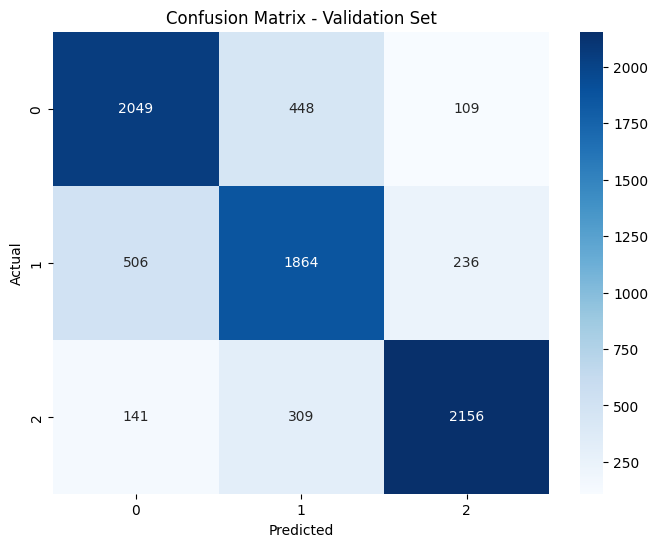

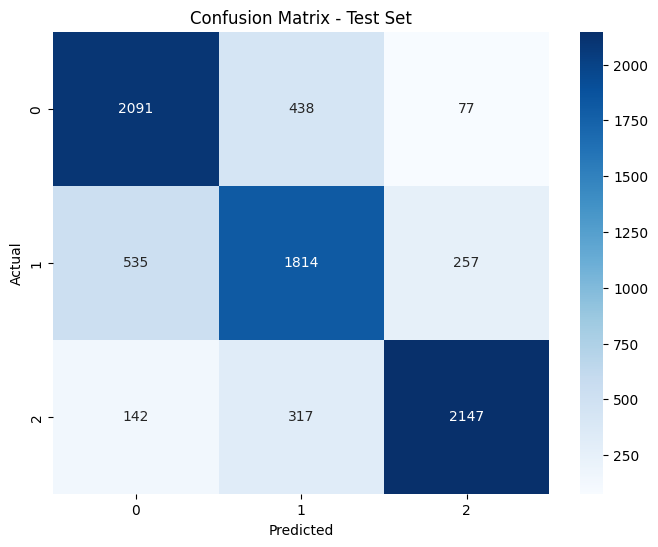

In [26]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# ... (previous code for model training, validation, and testing)

# Calculate confusion matrix for validation set
conf_matrix_val = confusion_matrix(y_val, y_pred_val_tfidf)

# Display confusion matrix for validation set
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_val, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Validation Set')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Calculate confusion matrix for test set
conf_matrix_test = confusion_matrix(y_test, y_pred_test_tfidf)

# Display confusion matrix for test set
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_test, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Test Set')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [ ]:
# Calculate and print confusion matrix for validation set
conf_matrix_val = confusion_matrix(y_val, y_pred_val_tfidf)
print("Confusion Matrix - Validation Set:")
print(conf_matrix_val)

# Calculate and print confusion matrix for test set
conf_matrix_test = confusion_matrix(y_test, y_pred_test_tfidf)
print("\nConfusion Matrix - Test Set:")
print(conf_matrix_test)


Confusion Matrix - Validation Set:
[[1025  255   54]
 [ 262  952  120]
 [  69  184 1082]]

Confusion Matrix - Test Set:
[[2047  471   88]
 [ 543 1817  246]
 [ 141  319 2146]]


In [ ]:
# Assuming svm_model_tfidf is your trained SVM model
# Get support vectors
support_vectors = svm_model_tfidf.support_vectors_
print(f'Support Vectors: {support_vectors}')

# Get coefficients (weights) assigned to features
coefficients = svm_model_tfidf.coef_
print(f'Coefficients: {coefficients}')

# Get intercepts (bias terms)
intercepts = svm_model_tfidf.intercept_
print(f'Intercepts: {intercepts}')


Support Vectors:   (0, 23)	0.35244619458535476
  (0, 692)	0.4576600440659272
  (0, 2977)	0.3383311327078973
  (0, 3597)	0.20955469734334017
  (0, 5303)	0.4339060033863644
  (0, 5495)	0.21709559057094371
  (0, 5704)	0.25200523220993276
  (0, 6130)	0.2311767358132092
  (0, 6314)	0.30934929326226024
  (0, 6489)	0.19519013989474374
  (0, 6925)	0.1476395137939429
  (1, 5779)	0.3603150400641032
  (1, 5878)	0.2746411141488227
  (1, 5912)	0.6614019512738011
  (1, 6314)	0.3082097726520202
  (1, 6489)	0.1944711365151655
  (1, 6738)	0.4126080523259441
  (1, 6883)	0.18054905662613818
  (1, 6925)	0.147095668139473
  (2, 577)	0.1125853308006026
  (2, 796)	0.06853537303720085
  (2, 1395)	0.08364844143031344
  (2, 1418)	0.061975965707032926
  (2, 1644)	0.10895252179686424
  (2, 2029)	0.12858346523959732
  :	:
  (9837, 6314)	0.21941615479151563
  (9837, 6954)	0.3702199387882751
  (9837, 6961)	0.24752551764408362
  (9838, 1061)	0.5624331480927415
  (9838, 1527)	0.1597505513023592
  (9838, 3179)	0.197110